In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("updated_transactions2.csv")

In [3]:
data.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,12,2021.0
1,Airtel Payments Bank Apps,8.41,1923.95,15.90,5554.63,11,2021.0
2,Airtel Payments Bank Apps,7.60,1491.34,14.31,4746.79,10,2021.0
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,9,2021.0
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,8,2021.0


In [4]:
data.isnull().sum()

UPI Banks                   0
Volume (Mn) By Costumers    0
Value (Cr) by Costumers     0
Volume (Mn)                 0
Value (Cr)                  0
Month                       0
Year                        0
dtype: int64

In [5]:
data.shape

(1011, 7)

In [6]:
data.describe()

,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,37.758566,7117.662315,39.375569,7241.182156,5.706231,2021.353116
std,208.327176,40098.113040,209.956462,40219.944323,3.258158,0.478175
min,0.010000,0.260000,0.010000,0.260000,1.000000,2021.000000
25%,0.040000,15.370000,0.040000,15.370000,3.000000,2021.000000
50%,0.150000,52.080000,0.150000,52.080000,5.000000,2021.000000
75%,1.630000,255.825000,1.630000,255.825000,8.000000,2022.000000
max,2077.600000,394565.580000,2077.600000,394565.580000,12.000000,2022.000000


In [7]:
print(data.isna().sum())

UPI Banks                   0
Volume (Mn) By Costumers    0
Value (Cr) by Costumers     0
Volume (Mn)                 0
Value (Cr)                  0
Month                       0
Year                        0
dtype: int64


In [8]:
from scipy import stats

# Select the numeric columns to check for outliers
numeric_cols = ['Volume (Mn) By Costumers', 'Value (Cr) by Costumers', 'Volume (Mn)', 'Value (Cr)']

# Calculate z-scores for each numeric column
z_scores = stats.zscore(data[numeric_cols])

# Identify rows with any z-score greater than 3 or less than -3
outliers = (abs(z_scores) > 3).any(axis=1)

# Print the number of outliers found
print(f"Number of outliers: {outliers.sum()}")

# Print the rows containing outliers
print(data[outliers])

Number of outliers: 25
                   UPI Banks  Volume (Mn) By Costumers  \
252               Google Pay                   1587.43   
253               Google Pay                   1447.84   
254               Google Pay                   1451.93   
255               Google Pay                   1294.56   
256               Google Pay                   1243.75   
257               Google Pay                   1119.16   
258               Google Pay                    972.26   
259               Google Pay                    880.59   
260               Google Pay                    905.96   
261               Google Pay                    957.01   
262               Google Pay                    827.86   
263               Google Pay                    853.53   
475  Paytm Payments Bank App                    612.71   
487                  PhonePe                   2077.60   
488                  PhonePe                   1911.21   
489                  PhonePe                   19

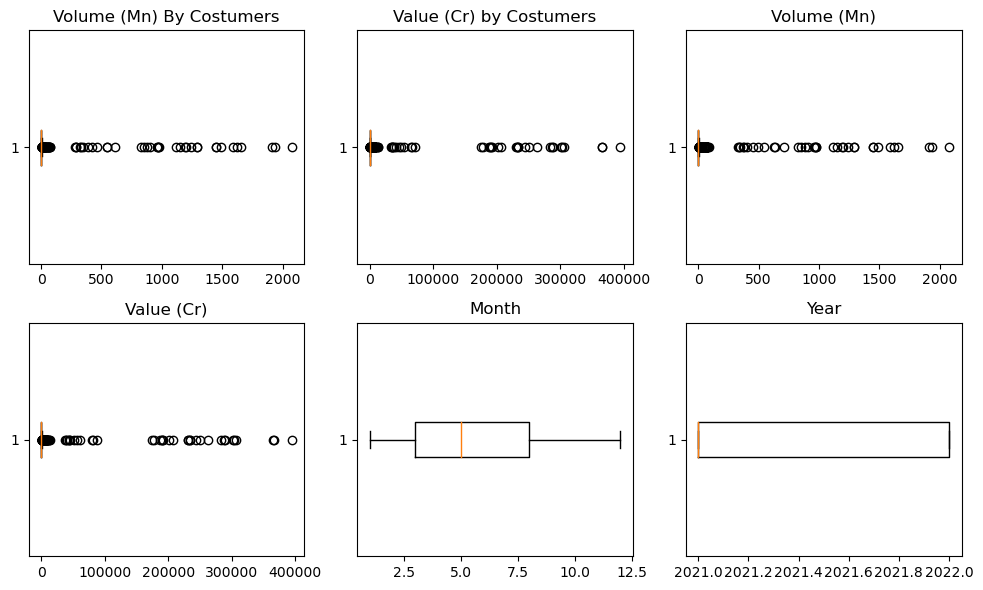

In [9]:
# check for outliers using box plot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
axs = axs.ravel()

for i, col in enumerate(data.columns):
    if col == 'Unnamed: 0':
        continue
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        axs[i-1].boxplot(data[col], vert=False)
        axs[i-1].set_title(col)
        
plt.tight_layout()

# Descriptive analysis

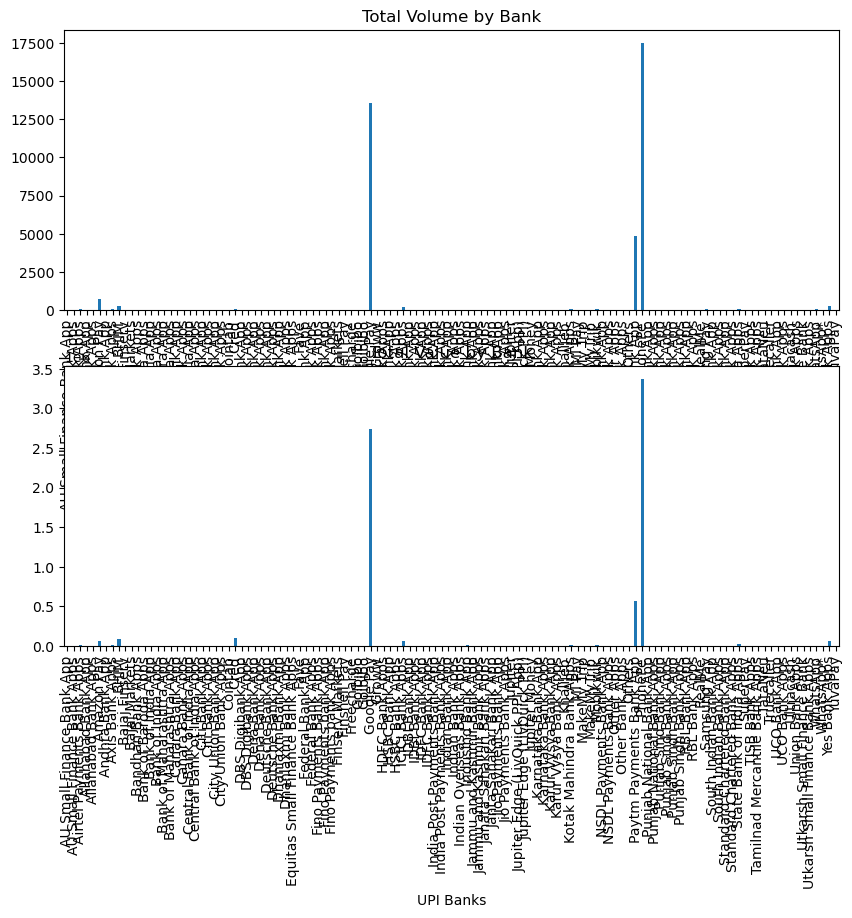

In [10]:
# Calculate basic descriptive statistics
volume_stats = data['Volume (Mn) By Costumers'].describe()
value_stats = data['Value (Cr) by Costumers'].describe()

# Calculate total volume and value for each bank
total_volume = data.groupby('UPI Banks')['Volume (Mn) By Costumers'].sum()
total_value = data.groupby('UPI Banks')['Value (Cr) by Costumers'].sum()

# Plot bar chart for total volume and value by bank
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
total_volume.plot(kind='bar', ax=ax[0], title='Total Volume by Bank')
total_value.plot(kind='bar', ax=ax[1], title='Total Value by Bank')
plt.show()

# Trend analysis

C:\Users\Anju Reddy K\AppData\Local\Temp\ipykernel_8064\3976864687.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_data = data.groupby(['Year', 'Month']).sum()


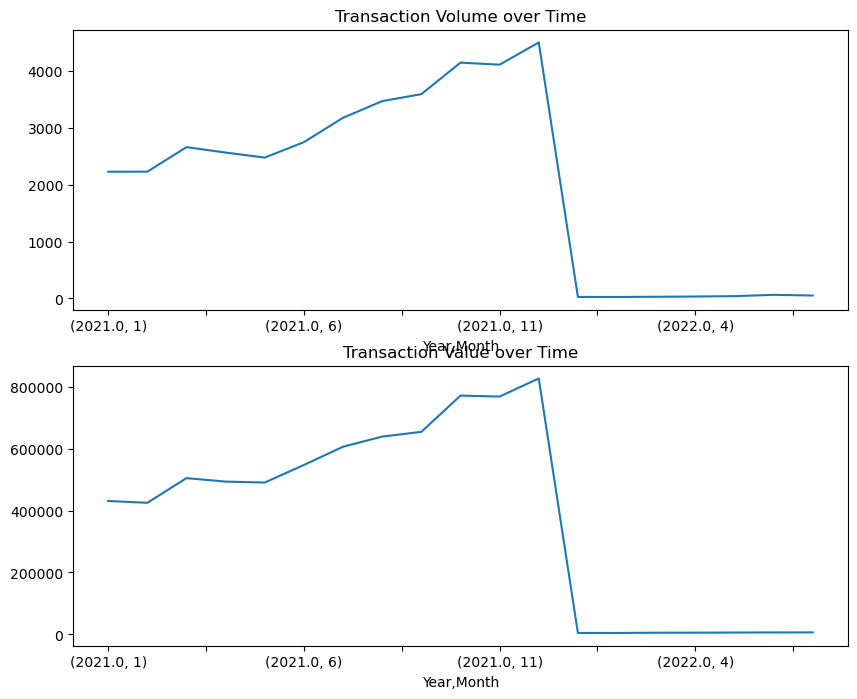

In [11]:
# Plot line chart for transaction volume and value over time
time_data = data.groupby(['Year', 'Month']).sum()
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
time_data['Volume (Mn) By Costumers'].plot(ax=ax[0], title='Transaction Volume over Time')
time_data['Value (Cr) by Costumers'].plot(ax=ax[1], title='Transaction Value over Time')
plt.show()

# Correlation analysis

In [12]:
# Calculate correlation coefficient between volume and value
corr_coef = data['Volume (Mn) By Costumers'].corr(data['Value (Cr) by Costumers'])
print("Correlation Coefficient:", corr_coef)

# Calculate correlation between volume and value by bank
bank_corr = data.groupby('UPI Banks')['Volume (Mn) By Costumers', 'Value (Cr) by Costumers'].corr()
print(bank_corr)

Correlation Coefficient: 0.9952477107790277
                                                     Volume (Mn) By Costumers  \
UPI Banks                                                                       
AU Small Finance Bank App  Volume (Mn) By Costumers                  1.000000   
                           Value (Cr) by Costumers                   0.997487   
AU Small Finance Bank Apps Volume (Mn) By Costumers                  1.000000   
                           Value (Cr) by Costumers                   0.929598   
Airtel Payments Bank Apps  Volume (Mn) By Costumers                  1.000000   
...                                                                       ...   
WhatsApp*                  Value (Cr) by Costumers                        NaN   
Yes Bank Apps              Volume (Mn) By Costumers                  1.000000   
                           Value (Cr) by Costumers                   0.391711   
YuvaPay                    Volume (Mn) By Costumers              

C:\Users\Anju Reddy K\AppData\Local\Temp\ipykernel_8064\2046309227.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bank_corr = data.groupby('UPI Banks')['Volume (Mn) By Costumers', 'Value (Cr) by Costumers'].corr()


# Cluster analysis

C:\Users\Anju Reddy K\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anju Reddy K\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


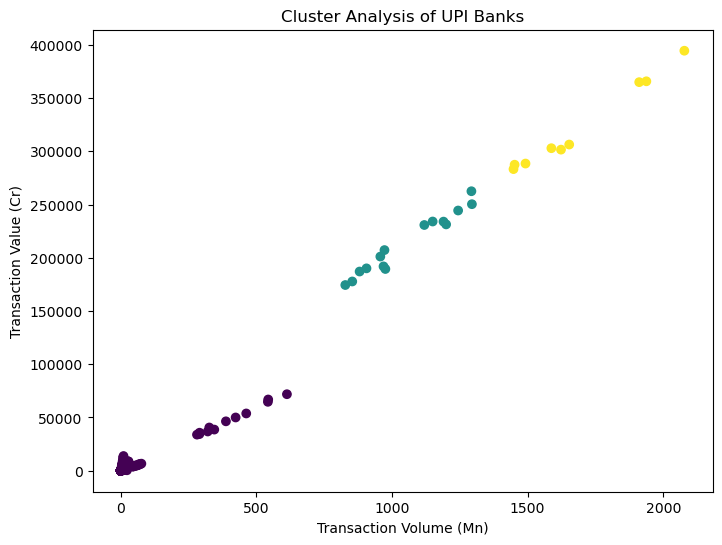

In [13]:
from sklearn.cluster import KMeans

# Cluster banks based on transaction volume and value
X = data[['Volume (Mn) By Costumers', 'Value (Cr) by Costumers']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

# Plot scatter plot with colored clusters
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X['Volume (Mn) By Costumers'], X['Value (Cr) by Costumers'], c=labels)
plt.xlabel('Transaction Volume (Mn)')
plt.ylabel('Transaction Value (Cr)')
plt.title('Cluster Analysis of UPI Banks')
plt.show()

# Distribution plots

C:\Users\Anju Reddy K\AppData\Local\Temp\ipykernel_8064\27657883.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Volume (Mn) By Costumers"])


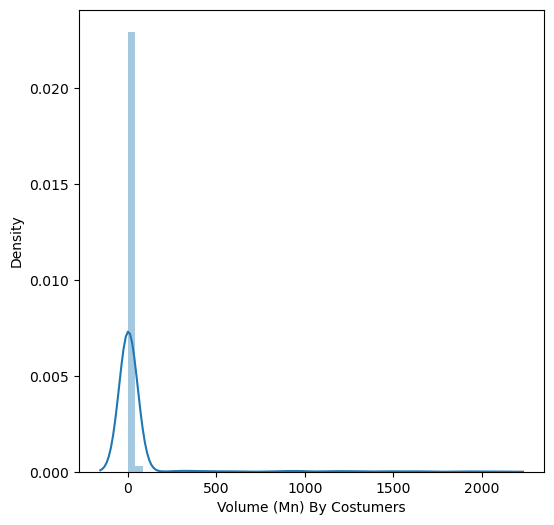

In [14]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.distplot(data["Volume (Mn) By Costumers"])
plt.show()

C:\Users\Anju Reddy K\AppData\Local\Temp\ipykernel_8064\893043966.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Value (Cr) by Costumers"])


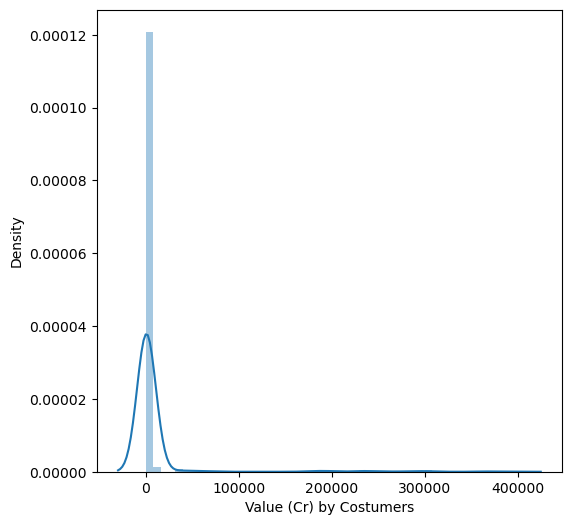

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(data["Value (Cr) by Costumers"])
plt.show()

C:\Users\Anju Reddy K\AppData\Local\Temp\ipykernel_8064\1333448217.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Volume (Mn)"])


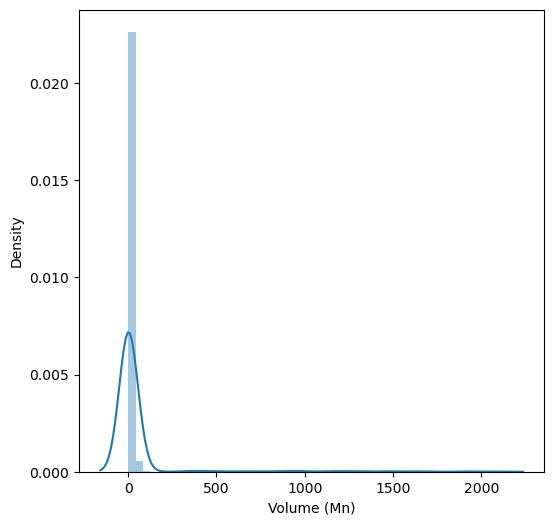

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(data["Volume (Mn)"])
plt.show()

C:\Users\Anju Reddy K\AppData\Local\Temp\ipykernel_8064\376308092.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

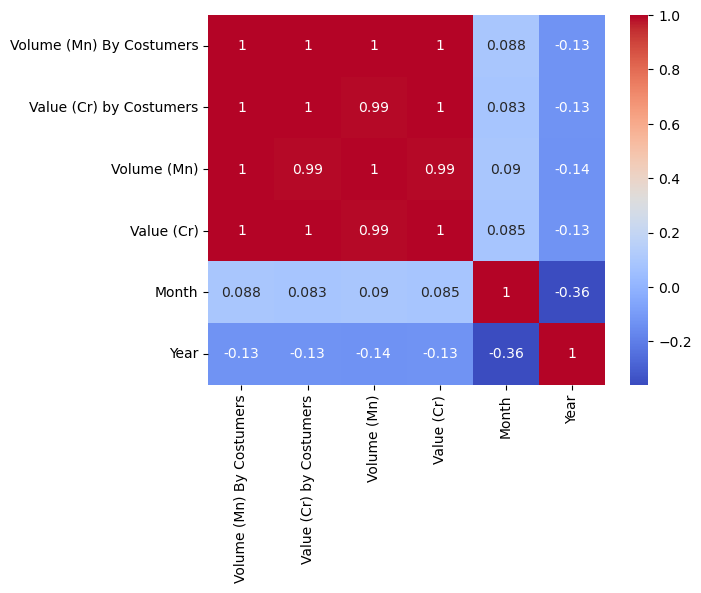

In [17]:
corr_matrix = data.corr()

# Print the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [18]:
# create new features by adding columns
data["Total Value (Cr)"] = data["Value (Cr)"] + data["Value (Cr) by Costumers"]
data["Total Volume (Mn)"] = data["Volume (Mn)"] + data["Volume (Mn) By Costumers"]

# save the updated dataset
data.to_csv("updated_dataset.csv", index=False)